

*   Crime Investigators
*   Working with Crime Data
*   You must use Apache Spark for this assignment.
*   Chicago crime dataset (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data).


**1.Install the required libraries**

In [79]:
!pip install pyspark

**2.Create a Spark Session**

In [80]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, DoubleType, BooleanType, DateType
spark = SparkSession.builder.appName("Crime_Investigation").getOrCreate()

**3.Define the schema for loading the Chicago crime dataset**<br>

In [81]:
#defining the schema for chicago crime dataset
schema = StructType([StructField("ID",StringType(),True),
                     StructField("CaseNumber",StringType(),True),
                     StructField("Date",StringType(),True),
                     StructField("Block", StringType(), True), 
                     StructField("IUCR", StringType(), True), 
                     StructField("PrimaryType", StringType(), True),
                     StructField("Description", StringType(), True),
                     StructField("LocationDescription", StringType(), True),
                     StructField("Arrest", BooleanType(), True),
                     StructField("Domestic", BooleanType(), True),
                     StructField("Beat", StringType(), True),
                     StructField("District", StringType(), True),
                     StructField("Ward", StringType(), True),
                     StructField("CommunityArea", StringType(), True),
                     StructField("FBICode", StringType(), True ),
                     StructField("XCoordinate", DoubleType(), True),
                     StructField("YCoordinate", DoubleType(), True ),
                     StructField("Year", IntegerType(), True),
                     StructField("UpdatedOn", StringType(), True ),
                     StructField("Latitude", DoubleType(), True),
                     StructField("Longitude", DoubleType(), True),
                     StructField("Location", StringType(), True )
                     ])

**4.Load the Chicago crime data (you should get more than a million rows).**

In [83]:
#reading the csv file and loading the data into spark dataframe.
crime_data = spark.read.csv('Crimes_-_2001_to_Present.csv',
                            header = True, 
                            schema = schema)

In [84]:
print('Chicago Crime dataset has',crime_data.count(),'records')

Chicago Crime dataset has 7760248 records


From the above result, it is evident that the dataset contains more than a million rows.

In [42]:
#printing first 5 rows of the dataset.
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))
crime_data.show(5,truncate = False)

23/03/26 15:00:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, CaseNumber, Date, Block, IUCR, PrimaryType, Description, LocationDescription, Arrest, Domestic, Beat, District, Ward, CommunityArea, FBICode, XCoordinate, YCoordinate, Year, UpdatedOn, Latitude, Longitude, Location
Expected: CaseNumber but found: Case Number
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv
+--------+----------+----------------------+---------------------+----+-----------+-----------------------+-------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Cas

**5.Clean the data:**

In [85]:
#check if spark dataframe has null values.
#this dictionary gives the count of null values for each column in spark dataframe.
{col:crime_data.filter(crime_data[col].isNull()).count() for col in crime_data.columns}

23/03/26 15:02:07 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Case Number
 Schema: CaseNumber
Expected: CaseNumber but found: Case Number
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


23/03/26 15:02:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Primary Type
 Schema: PrimaryType
Expected: PrimaryType but found: Primary Type
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


23/03/26 15:02:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Location Description
 Schema: LocationDescription
Expected: LocationDescription but found: Location Description
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


23/03/26 15:02:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Community Area
 Schema: CommunityArea
Expected: CommunityArea but found: Community Area
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


23/03/26 15:02:34 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: FBI Code
 Schema: FBICode
Expected: FBICode but found: FBI Code
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


23/03/26 15:02:37 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: X Coordinate
 Schema: XCoordinate
Expected: XCoordinate but found: X Coordinate
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


23/03/26 15:02:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Y Coordinate
 Schema: YCoordinate
Expected: YCoordinate but found: Y Coordinate
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


23/03/26 15:02:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Updated On
 Schema: UpdatedOn
Expected: UpdatedOn but found: Updated On
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


{'ID': 0,
 'CaseNumber': 4,
 'Date': 0,
 'Block': 0,
 'IUCR': 0,
 'PrimaryType': 0,
 'Description': 0,
 'LocationDescription': 10217,
 'Arrest': 0,
 'Domestic': 0,
 'Beat': 0,
 'District': 47,
 'Ward': 614848,
 'CommunityArea': 613476,
 'FBICode': 0,
 'XCoordinate': 85733,
 'YCoordinate': 85733,
 'Year': 0,
 'UpdatedOn': 0,
 'Latitude': 85733,
 'Longitude': 85733,
 'Location': 85733}

**5.1 Remove all null values.**


In [86]:
#dropping all the null values from the spark dataframe 
crime_data_cleaned = crime_data.dropna()

In [87]:
#checking the number of records remained after removing the null values from the spark dataframe
print('Number of records in the chicago dataset after removing null values is',
       crime_data_cleaned.count())

23/03/26 15:02:52 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, CaseNumber, Date, Block, IUCR, PrimaryType, Description, LocationDescription, Arrest, Domestic, Beat, District, Ward, CommunityArea, FBICode, XCoordinate, YCoordinate, Year, UpdatedOn, Latitude, Longitude, Location
Expected: CaseNumber but found: Case Number
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


Number of records in the chicago dataset after removing null values is 7061244


**5.2 Change 'Date' column data type**

In [88]:
#check the data type of date column 
crime_data_cleaned.printSchema()

root
 |-- ID: string (nullable = true)
 |-- CaseNumber: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- XCoordinate: double (nullable = true)
 |-- YCoordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- UpdatedOn: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



It can be observed from the above information that the date column is of string data type.

In [89]:
from pyspark.sql.functions import unix_timestamp, from_unixtime, year, to_timestamp, hour

In [90]:
#changing the format of the Date column (from 12 hr to 24 hr) 
#and storing the data in new column by name Date_time before dropping Date column.
crime_data_changed_datatype = crime_data_cleaned.withColumn('Date_time', 
                              from_unixtime(unix_timestamp('Date','MM/dd/yyyy hh:mm:ss a'),'yyyy-MM-dd HH:mm:ss'))\
                              .drop('Date')

In [91]:
#converting the Date_time data type from string to time stamp
crime_data_changed_datatype = crime_data_changed_datatype.withColumn("Date_time",to_timestamp('Date_time'))

In [92]:
crime_data_changed_datatype.printSchema()

root
 |-- ID: string (nullable = true)
 |-- CaseNumber: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- PrimaryType: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- LocationDescription: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- CommunityArea: string (nullable = true)
 |-- FBICode: string (nullable = true)
 |-- XCoordinate: double (nullable = true)
 |-- YCoordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- UpdatedOn: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Date_time: timestamp (nullable = true)



From the above information, it can be observed that the Date_column datatype has been changed to timestamp.

**5.3 Filter the data for last ten years.**

In [93]:
#filtering the data based on condition i.e., data from year 2014 to 2023
crime_data_last_10_years = crime_data_changed_datatype.filter(crime_data_changed_datatype.Year>(2023-10))

**5.4 Remove all the records with the following crime types:**<br>
'NON-CRIMINAL (SUBJECT SPECIFIED)'
'OTHER OFFENSE'
'STALKING'
'NON - CRIMINAL'
'ARSON'

In [94]:
#removing all the records for the above mentioned crime types.
crime_data_filtered_crimetypes = crime_data_last_10_years.filter("PrimaryType NOT IN \
                                ('NON-CRIMINAL (SUBJECT SPECIFIED)','OTHER OFFENSE', \
                                 'STALKING','NON - CRIMINAL','ARSON')")

**5.5 Merge the similar crime types.**<br>
For example, change 'Primary Type' of cases that have 'Primary Type' as ‘SEX OFFENSE’ or ‘PROSTITUTION’ such that they should have the same 'Primary Type'.


In [53]:
from pyspark.sql.functions import when
crime_data_merged_crimetypes = crime_data_filtered_crimetypes.withColumn("PrimaryType", \
                               when(crime_data_filtered_crimetypes.PrimaryType == "PROSTITUTION","SEX OFFENSE").\
                               otherwise(crime_data_filtered_crimetypes.PrimaryType))

In [54]:
crime_data_merged_crimetypes.select(['PrimaryType']).distinct().show(truncate = False)

23/03/26 15:01:31 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, CaseNumber, Date, Block, IUCR, PrimaryType, Description, LocationDescription, Arrest, Domestic, Beat, District, Ward, CommunityArea, FBICode, XCoordinate, YCoordinate, Year, UpdatedOn, Latitude, Longitude, Location
Expected: CaseNumber but found: Case Number
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


+---------------------------------+
|PrimaryType                      |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|PUBLIC INDECENCY                 |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|SEX OFFENSE                      |
+---------------------------------+
only showing top 20 rows



We can observe from the above information that the CRIMINAL SEXUAL ASSAULT and CRIM SEXUAL ASSAULT crime types looks similar and therefore merging them into of single crime type as CRIMINAL SEXUAL ASSAULT.

In [55]:
crime_data_merged_crimetypes = crime_data_merged_crimetypes.withColumn("PrimaryType", \
                               when(crime_data_merged_crimetypes.PrimaryType == "CRIM SEXUAL ASSAULT",\
                               "CRIMINAL SEXUAL ASSAULT").otherwise(crime_data_merged_crimetypes.PrimaryType))

**6. Analyze the data and present results:**

**6.1 Show year-wise trend of the crime for last ten years.**


In [56]:
import pandas as pd
year_counts = {}
for i in crime_data_merged_crimetypes.groupBy("Year").count().collect():
    year_counts[i[0]] = i[1]  

23/03/26 15:01:34 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, CaseNumber, Date, Block, IUCR, PrimaryType, Description, LocationDescription, Arrest, Domestic, Beat, District, Ward, CommunityArea, FBICode, XCoordinate, YCoordinate, Year, UpdatedOn, Latitude, Longitude, Location
Expected: CaseNumber but found: Case Number
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


In [57]:
trend_data = pd.DataFrame(list(zip(year_counts.keys(),year_counts.values())),columns = ['Year','Crime_counts'])

In [58]:
trend_data.sort_values(by=['Year'],inplace=True)

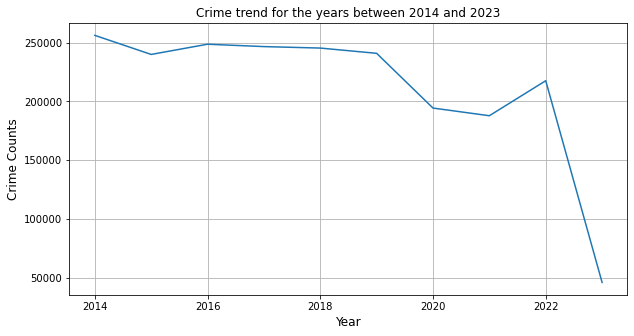

In [69]:
import matplotlib.pyplot as plt

trend_data.plot.line(x='Year', y='Crime_counts',legend=False,figsize=(10,5))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Crime Counts',fontsize=12)
plt.title('Crime trend for the years between 2014 and 2023',fontsize=12)
plt.grid(True)
plt.show()

**Observations:**

1.   From the above line plot, it is evident that the number of crimes 
recorded is highest during 2014 and lowest in 2023.
2.   There is a sharp decline in number of crimes from 2022 to 2023 by observing the slope of line.
3.   Also, there is no signficant change in number of crimes from 2016 to 2018.

**6.2 Find top ten crimes and present them as a bar chart.**

In [70]:
crime_counts = {}
for i in crime_data_merged_crimetypes.groupBy("PrimaryType").count().collect():
    crime_counts[i[0]] = i[1]  

23/03/26 15:01:47 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, CaseNumber, Date, Block, IUCR, PrimaryType, Description, LocationDescription, Arrest, Domestic, Beat, District, Ward, CommunityArea, FBICode, XCoordinate, YCoordinate, Year, UpdatedOn, Latitude, Longitude, Location
Expected: CaseNumber but found: Case Number
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


In [71]:
from collections import Counter
crime_counts_top_10 = dict(Counter(crime_counts).most_common(10))

In [72]:
crimetype_data = pd.DataFrame(list(zip(crime_counts_top_10.keys(),crime_counts_top_10.values()))
                  ,columns = ['Crime_type','Crime_counts'])

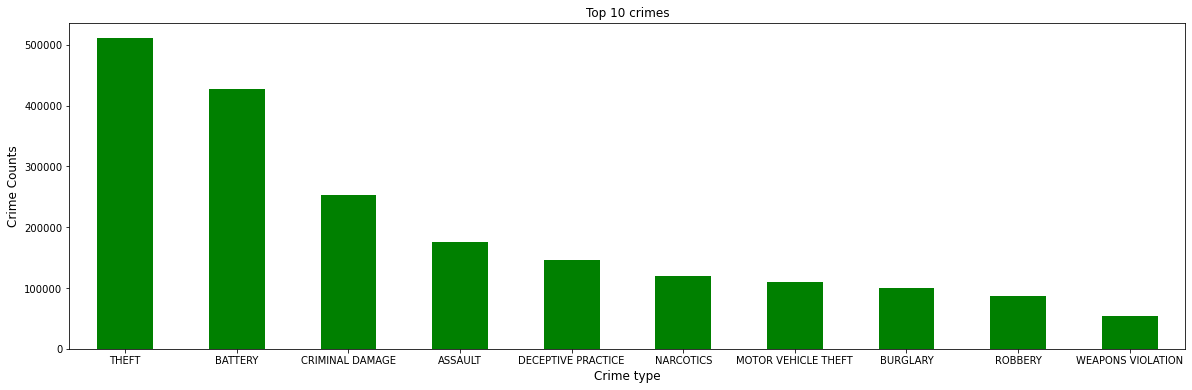

In [73]:
crimetype_data.plot(figsize = (20,6), kind = "bar", color = "green",
                    x = "Crime_type", y = "Crime_counts", legend = False)
plt.xlabel('Crime type',fontsize=12)
plt.ylabel('Crime Counts',fontsize=12)
plt.title('Top 10 crimes',fontsize=12)
plt.xticks(rotation = 0)
plt.show()

**Observations:**

1.   Among the top 10 crimes, crimetype theft has the highest number of crimes whereas crimetype weapons-violation has the lowest number of crimes.

**6.3 Find out at which hour of the day crime is highest.**


In [74]:
#creating a new column by name hour using the data from Date_time column 
hourly_crime_data = crime_data_merged_crimetypes.withColumn("hour",hour("Date_time"))

In [75]:
hour_counts = {}
for i in hourly_crime_data.groupBy("hour").count().collect():
    hour_counts[i[0]] = i[1]  

23/03/26 15:01:51 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location
 Schema: ID, CaseNumber, Date, Block, IUCR, PrimaryType, Description, LocationDescription, Arrest, Domestic, Beat, District, Ward, CommunityArea, FBICode, XCoordinate, YCoordinate, Year, UpdatedOn, Latitude, Longitude, Location
Expected: CaseNumber but found: Case Number
CSV file: file:///Users/harshithnalgonda/Downloads/Chicago_Crimes_Spark/Crimes_-_2001_to_Present.csv


In [76]:
hour_data = pd.DataFrame(list(zip(hour_counts.keys(),hour_counts.values())),columns = ['Hour','Crime_counts']).\
            sort_values(by=['Hour']).reset_index(drop=True)

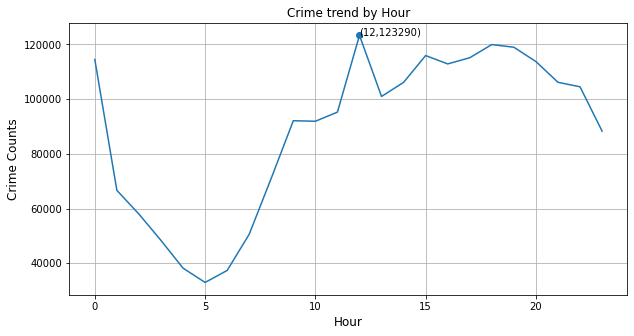

In [78]:
hour_data.plot.line(x='Hour', y='Crime_counts',legend=False,figsize=(10,5))
u = list(hour_data[hour_data['Crime_counts'] == hour_data['Crime_counts'].max()].Hour)[0]
v = list(hour_data[hour_data['Crime_counts'] == hour_data['Crime_counts'].max()].Crime_counts)[0]
plt.scatter(u,v)
plt.text(u,v,'({0},{1})'.format(u,v))
plt.xlabel('Hour',fontsize=12)
plt.ylabel('Crime Counts',fontsize=12)
plt.title('Crime trend by Hour',fontsize=12)
plt.grid(True)
plt.show()

**Observations:**

From the above figure, it is evident that the crime is highest at 12th hour of the day which is noon time.